<a href="https://colab.research.google.com/github/Chan0226/Deep-Learning/blob/main/%EC%BB%A8%EB%B3%BC%EB%A5%98%EC%85%981.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524
# https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
# https://cs231n.github.io/convolutional-networks/

In [ ]:
# mnist  - 컨볼류션을 적용한 다층 퍼셉트론
# C-P-C-P-C-FC-FC

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist  # 28 * 28
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train,y_train),(x_test,y_test)  = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train = x_train.reshape(60000,28,28,1)  # 2차원
x_test = x_test.reshape(10000,28,28,1)


In [ ]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [ ]:
# LeNet-5 신경망
cnn = Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1) ))  # C - 
cnn.add(MaxPooling2D(pool_size=(2,2)))                                          # pooling
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu' ))
cnn.add(MaxPooling2D(pool_size=(2,2)))                                          # pooling
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu' ))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

In [ ]:
# 학습
cnn.compile(loss = 'categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
hist = cnn.fit(x_train,y_train,batch_size=524,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
115/115 - 33s - loss: 0.4523 - accuracy: 0.8683 - val_loss: 0.1275 - val_accuracy: 0.9622 - 33s/epoch - 290ms/step
Epoch 2/30
115/115 - 3s - loss: 0.1029 - accuracy: 0.9686 - val_loss: 0.0741 - val_accuracy: 0.9771 - 3s/epoch - 23ms/step
Epoch 3/30
115/115 - 2s - loss: 0.0673 - accuracy: 0.9790 - val_loss: 0.0480 - val_accuracy: 0.9835 - 2s/epoch - 22ms/step
Epoch 4/30
115/115 - 3s - loss: 0.0532 - accuracy: 0.9840 - val_loss: 0.0377 - val_accuracy: 0.9860 - 3s/epoch - 23ms/step
Epoch 5/30
115/115 - 2s - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.0324 - val_accuracy: 0.9902 - 2s/epoch - 21ms/step
Epoch 6/30
115/115 - 3s - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0320 - val_accuracy: 0.9891 - 3s/epoch - 23ms/step
Epoch 7/30
115/115 - 3s - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0384 - val_accuracy: 0.9857 - 3s/epoch - 23ms/step
Epoch 8/30
115/115 - 2s - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0254 - val_accuracy: 0.9917 - 2s/epoch - 22ms/step
Epoch 9/30
11

In [ ]:
res = cnn.evaluate(x_test,y_test)
print("정확율(accuracy) :",res[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0322 - accuracy: 0.9922
정확율(accuracy) : 0.9922000169754028


313/313 [==============================] - 1s 5ms/step - loss: 0.0322 - accuracy: 0.9922
정확율(accuracy) : 0.9922000169754028


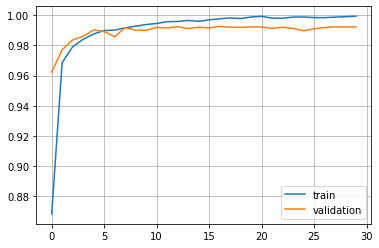

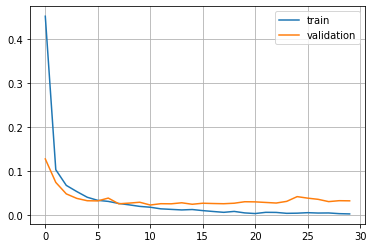

In [ ]:
res = cnn.evaluate(x_test,y_test)
print("정확율(accuracy) :",res[1])
import matplotlib.pyplot as plt
# 정확율
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()

#손실율
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()

In [ ]:
# C-C-P-dropout-FC-dropout-FC == C-C-P-FC-FC

In [ ]:
from tensorflow.keras.layers import Dropout
# 신경망 모델을 설계
cnn = Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1) ))  # C
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu' ))                       # C
cnn.add(MaxPooling2D(pool_size=(2,2)))                                            # P
cnn.add(Dropout(0.25))                                                            # D
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dropout(0.25))                                                            # D
cnn.add(Dense(10,activation='softmax'))

In [ ]:
cnn.compile(loss = 'categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
hist = cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
469/469 - 5s - loss: 0.2806 - accuracy: 0.9144 - val_loss: 0.0623 - val_accuracy: 0.9795 - 5s/epoch - 11ms/step
Epoch 2/30
469/469 - 4s - loss: 0.0879 - accuracy: 0.9725 - val_loss: 0.0461 - val_accuracy: 0.9841 - 4s/epoch - 8ms/step
Epoch 3/30
469/469 - 4s - loss: 0.0676 - accuracy: 0.9797 - val_loss: 0.0344 - val_accuracy: 0.9892 - 4s/epoch - 8ms/step
Epoch 4/30
469/469 - 4s - loss: 0.0536 - accuracy: 0.9826 - val_loss: 0.0310 - val_accuracy: 0.9898 - 4s/epoch - 8ms/step
Epoch 5/30
469/469 - 4s - loss: 0.0455 - accuracy: 0.9857 - val_loss: 0.0320 - val_accuracy: 0.9893 - 4s/epoch - 8ms/step
Epoch 6/30
469/469 - 4s - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.0317 - val_accuracy: 0.9896 - 4s/epoch - 8ms/step
Epoch 7/30
469/469 - 4s - loss: 0.0360 - accuracy: 0.9883 - val_loss: 0.0284 - val_accuracy: 0.9911 - 4s/epoch - 8ms/step
Epoch 8/30
469/469 - 4s - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0289 - val_accuracy: 0.9910 - 4s/epoch - 8ms/step
Epoch 9/30
469/469 - 4s

313/313 [==============================] - 1s 5ms/step - loss: 0.0334 - accuracy: 0.9923
정확율(accuracy) : 0.9922999739646912


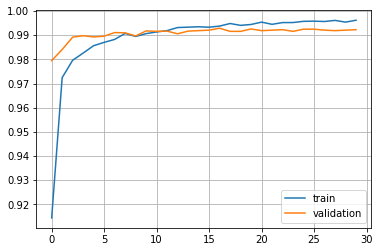

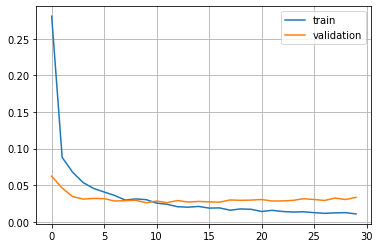

In [ ]:
res = cnn.evaluate(x_test,y_test)
print("정확율(accuracy) :",res[1])
import matplotlib.pyplot as plt
# 정확율
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()

#손실율
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()

In [ ]:
# cnn CIFAR-10

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

170508288/170498071 [==============================] - 14s 0us/step


In [ ]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 10))

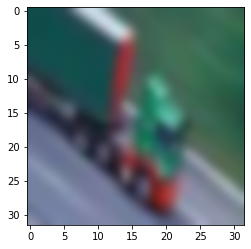

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
plt.imshow(x_train[50],interpolation='bicubic')
plt.show()
y_train[50]

In [ ]:
# C-C-P-dropout-FC-dropout-FC == C-C-P-FC-FC
# C-C-P-C-C-P-FC-FC
# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

In [ ]:
# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)

Epoch 1/100
391/391 - 8s - loss: 1.6566 - accuracy: 0.3906 - val_loss: 1.3320 - val_accuracy: 0.5220 - 8s/epoch - 21ms/step
Epoch 2/100
391/391 - 7s - loss: 1.2836 - accuracy: 0.5405 - val_loss: 1.0802 - val_accuracy: 0.6117 - 7s/epoch - 18ms/step
Epoch 3/100
391/391 - 7s - loss: 1.1028 - accuracy: 0.6082 - val_loss: 0.9600 - val_accuracy: 0.6674 - 7s/epoch - 17ms/step
Epoch 4/100
391/391 - 7s - loss: 0.9946 - accuracy: 0.6474 - val_loss: 0.8899 - val_accuracy: 0.6906 - 7s/epoch - 17ms/step
Epoch 5/100
391/391 - 7s - loss: 0.9146 - accuracy: 0.6777 - val_loss: 0.8404 - val_accuracy: 0.7057 - 7s/epoch - 17ms/step
Epoch 6/100
391/391 - 7s - loss: 0.8562 - accuracy: 0.6986 - val_loss: 0.7740 - val_accuracy: 0.7276 - 7s/epoch - 17ms/step
Epoch 7/100
391/391 - 7s - loss: 0.8039 - accuracy: 0.7174 - val_loss: 0.7685 - val_accuracy: 0.7273 - 7s/epoch - 18ms/step
Epoch 8/100
391/391 - 7s - loss: 0.7618 - accuracy: 0.7322 - val_loss: 0.7420 - val_accuracy: 0.7446 - 7s/epoch - 17ms/step
Epoch 9/

313/313 [==============================] - 2s 5ms/step - loss: 0.6958 - accuracy: 0.8016
정확율(accuracy) : 0.8015999794006348


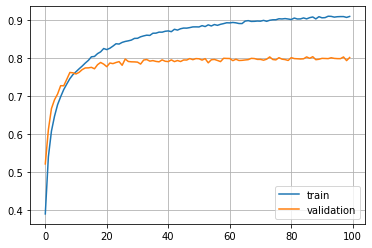

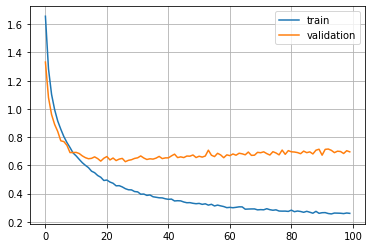

In [ ]:
res = cnn.evaluate(x_test,y_test)
print("정확율(accuracy) :",res[1])
import matplotlib.pyplot as plt
# 정확율
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()

#손실율
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','validation'],loc='best')
plt.grid()
plt.show()

In [ ]:
# 인공신경망 모델 저장
cnn.save('cnn_2021_11_17_2.h5')